In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.graph_objects as go

In [121]:
T = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if i != 0 and i != 99 and j != 0 and j != 99:
            T[i][j] = 5
        else:
            T[i][j] = 100

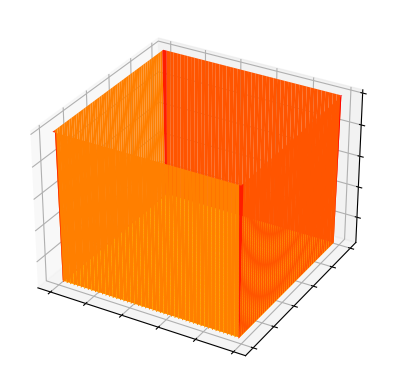

In [122]:
# Plot the surface
X, Y = np.arange(100), np.arange(100)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, T, cmap=cm.autumn_r)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()


In [110]:
fig = go.Figure(data=[go.Surface(z=T)])
fig.show()

In [111]:
delta_x = 0.1
delta_y = 0.1
beta_ = delta_x/delta_y

In [112]:
A = np.ones(98)
B = np.zeros(98)
C = np.ones(98)
D = np.zeros((98,98))

In [117]:
for n in range(1000):
    for i in range(98):
        B[i] = -2*(1+(beta_**2))
        for j in range(98):
            D[i][j] = -((beta_**2)*T[i][j+1])-((beta_**2)*T[i+2][j+1])
    D[:,0], D[:,-1] = -T[:,0][1:99], -T[:,-1][1:99]
    for i in range(98):
        for j in range(98):
            A[j] = 1
            B[j] = -2*(1+(beta_**2))
            C[j] = 1

        for j in range(98):
            if j == 0:
                C[j] = C[j]/B[j]
                D[i][j] = D[i][j]/B[j]
                B[j] = 1
                A[j] = 0
            elif j!=0 and j!= 97:
                C[j] = C[j]/(B[j]-(C[j-1]*A[j]/B[j-1]))
                D[i][j] = (D[i][j]-(D[i][j-1]*A[j]))/(B[j]-(C[j-1]*A[j]))
                B[j] = 1
                A[j] = 0
            elif j == 97:
                C[j] = 0
                D[i][j] = (D[i][j]-(D[i][j-1]*A[j]))/(B[j]-(C[j-1]*A[j]))
                B[j] = 1
                A[j] = 0
        for j in range(97,-1,-1):
            if j == 97:
                T[i+1][j+1] = D[i][j]
            elif j<=96 and j>=0:
                T[i+1][j+1] = (D[i][j] - (C[j]*T[i+1][j+2]))


In [118]:
fig = go.Figure(data=[go.Surface(z=T)])
fig.show()

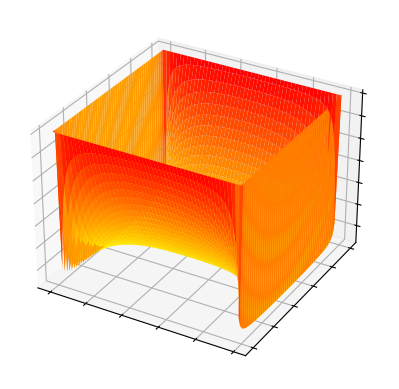

In [119]:
# Plot the surface
X, Y = np.arange(100), np.arange(100)
X, Y = np.meshgrid(X, Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, T, cmap=cm.autumn_r)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()
